<a href="https://colab.research.google.com/github/cxbxmxcx/AugmentedRealityGameDevelopment/blob/master/DRL_Dopamine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# @title Install necessary packages.
!pip install --upgrade --no-cache-dir dopamine-rl
!pip install gin-config

     |████████████████████████████████| 92kB 11.5MB/s 
  Found existing installation: dopamine-rl 1.0.5
    Uninstalling dopamine-rl-1.0.5:
      Successfully uninstalled dopamine-rl-1.0.5


In [0]:

import numpy as np
import os
from dopamine.discrete_domains import run_experiment
from dopamine.colab import utils as colab_utils
from absl import flags
import gin.tf

BASE_PATH = '/tmp/colab_dopamine_run'  # @param

TRAIN DQN

In [0]:
# @title Load the configuration for DQN.

DQN_PATH = os.path.join(BASE_PATH, 'dqn')
# Modified from dopamine/agents/dqn/config/dqn_cartpole.gin
dqn_config = """
# Hyperparameters for a simple DQN-style Cartpole agent. The hyperparameters
# chosen achieve reasonable performance.
import dopamine.discrete_domains.gym_lib
import dopamine.discrete_domains.run_experiment
import dopamine.agents.dqn.dqn_agent
import dopamine.replay_memory.circular_replay_buffer
import gin.tf.external_configurables

DQNAgent.observation_shape = %gym_lib.CARTPOLE_OBSERVATION_SHAPE
DQNAgent.observation_dtype = %gym_lib.CARTPOLE_OBSERVATION_DTYPE
DQNAgent.stack_size = %gym_lib.CARTPOLE_STACK_SIZE
DQNAgent.network = @gym_lib.CartpoleDQNNetwork
DQNAgent.gamma = 0.99
DQNAgent.update_horizon = 1
DQNAgent.min_replay_history = 500
DQNAgent.update_period = 4
DQNAgent.target_update_period = 100
DQNAgent.epsilon_fn = @dqn_agent.identity_epsilon
DQNAgent.tf_device = '/gpu:0'  # use '/cpu:*' for non-GPU version
DQNAgent.optimizer = @tf.train.AdamOptimizer()

tf.train.AdamOptimizer.learning_rate = 0.001
tf.train.AdamOptimizer.epsilon = 0.0003125

create_gym_environment.environment_name = 'CartPole'
create_gym_environment.version = 'v0'
create_agent.agent_name = 'dqn'
TrainRunner.create_environment_fn = @gym_lib.create_gym_environment
Runner.num_iterations = 50
Runner.training_steps = 1000
Runner.evaluation_steps = 1000
Runner.max_steps_per_episode = 200  # Default max episode length.

WrappedReplayBuffer.replay_capacity = 50000
WrappedReplayBuffer.batch_size = 128
"""
gin.parse_config(dqn_config, skip_unknown=False)

In [0]:
# @title Train DQN on Cartpole
dqn_runner = run_experiment.create_runner(DQN_PATH, schedule='continuous_train')
print('Will train DQN agent, please be patient, may be a while...')
dqn_runner.run_experiment()
print('Done training!')

INFO:tensorflow:Creating TrainRunner ...
INFO:tensorflow:Creating DQNAgent agent with the following parameters:
INFO:tensorflow:	 gamma: 0.990000
INFO:tensorflow:	 update_horizon: 1.000000
INFO:tensorflow:	 min_replay_history: 500
INFO:tensorflow:	 update_period: 4
INFO:tensorflow:	 target_update_period: 100
INFO:tensorflow:	 epsilon_train: 0.010000
INFO:tensorflow:	 epsilon_eval: 0.001000
INFO:tensorflow:	 epsilon_decay_period: 250000
INFO:tensorflow:	 tf_device: /gpu:0
INFO:tensorflow:	 use_staging: True
INFO:tensorflow:	 optimizer: <tensorflow.python.training.adam.AdamOptimizer object at 0x7f4569fd0208>
INFO:tensorflow:	 max_tf_checkpoints_to_keep: 4
INFO:tensorflow:Creating a OutOfGraphReplayBuffer replay memory with the following parameters:
INFO:tensorflow:	 observation_shape: (4, 1)
INFO:tensorflow:	 observation_dtype: <class 'numpy.float64'>
INFO:tensorflow:	 terminal_dtype: <class 'numpy.uint8'>
INFO:tensorflow:	 stack_size: 1
INFO:tensorflow:	 replay_capacity: 50000
INFO:tens

TRAIN C51

In [0]:
# @title Load the configuration for C51.

C51_PATH = os.path.join(BASE_PATH, 'c51')
# Modified from dopamine/agents/rainbow/config/c51_cartpole.gin
c51_config = """
# Hyperparameters for a simple C51-style Cartpole agent. The hyperparameters
# chosen achieve reasonable performance.
import dopamine.agents.dqn.dqn_agent
import dopamine.agents.rainbow.rainbow_agent
import dopamine.discrete_domains.gym_lib
import dopamine.discrete_domains.run_experiment
import dopamine.replay_memory.prioritized_replay_buffer
import gin.tf.external_configurables

RainbowAgent.observation_shape = %gym_lib.CARTPOLE_OBSERVATION_SHAPE
RainbowAgent.observation_dtype = %gym_lib.CARTPOLE_OBSERVATION_DTYPE
RainbowAgent.stack_size = %gym_lib.CARTPOLE_STACK_SIZE
RainbowAgent.network = @gym_lib.CartpoleRainbowNetwork
RainbowAgent.num_atoms = 51
RainbowAgent.vmax = 10.
RainbowAgent.gamma = 0.99
RainbowAgent.update_horizon = 1
RainbowAgent.min_replay_history = 500
RainbowAgent.update_period = 4
RainbowAgent.target_update_period = 100
RainbowAgent.epsilon_fn = @dqn_agent.identity_epsilon
RainbowAgent.replay_scheme = 'uniform'
RainbowAgent.tf_device = '/gpu:0'  # use '/cpu:*' for non-GPU version
RainbowAgent.optimizer = @tf.train.AdamOptimizer()

tf.train.AdamOptimizer.learning_rate = 0.001
tf.train.AdamOptimizer.epsilon = 0.0003125

create_gym_environment.environment_name = 'CartPole'
create_gym_environment.version = 'v0'
create_agent.agent_name = 'rainbow'
Runner.create_environment_fn = @gym_lib.create_gym_environment
Runner.num_iterations = 50
Runner.training_steps = 1000
Runner.evaluation_steps = 1000
Runner.max_steps_per_episode = 200  # Default max episode length.

WrappedPrioritizedReplayBuffer.replay_capacity = 50000
WrappedPrioritizedReplayBuffer.batch_size = 128
"""
gin.parse_config(c51_config, skip_unknown=False)

In [0]:
# @title Train C51 on Cartpole
c51_runner = run_experiment.create_runner(C51_PATH, schedule='continuous_train')
print('Will train agent, please be patient, may be a while...')
c51_runner.run_experiment()
print('Done training!')

INFO:tensorflow:Creating TrainRunner ...
INFO:tensorflow:Creating RainbowAgent agent with the following parameters:
INFO:tensorflow:	 gamma: 0.990000
INFO:tensorflow:	 update_horizon: 1.000000
INFO:tensorflow:	 min_replay_history: 500
INFO:tensorflow:	 update_period: 4
INFO:tensorflow:	 target_update_period: 100
INFO:tensorflow:	 epsilon_train: 0.010000
INFO:tensorflow:	 epsilon_eval: 0.001000
INFO:tensorflow:	 epsilon_decay_period: 250000
INFO:tensorflow:	 tf_device: /gpu:0
INFO:tensorflow:	 use_staging: True
INFO:tensorflow:	 optimizer: <tensorflow.python.training.adam.AdamOptimizer object at 0x7f455a4bde48>
INFO:tensorflow:	 max_tf_checkpoints_to_keep: 4
INFO:tensorflow:Creating a OutOfGraphPrioritizedReplayBuffer replay memory with the following parameters:
INFO:tensorflow:	 observation_shape: (4, 1)
INFO:tensorflow:	 observation_dtype: <class 'numpy.float64'>
INFO:tensorflow:	 terminal_dtype: <class 'numpy.uint8'>
INFO:tensorflow:	 stack_size: 1
INFO:tensorflow:	 replay_capacity: 

Plot results

In [0]:
# @title Load the training logs.
data = colab_utils.read_experiment(DQN_PATH, verbose=True,
                                   summary_keys=['train_episode_returns'])
data['agent'] = 'DQN'
data['run'] = 1
c51_data = colab_utils.read_experiment(C51_PATH, verbose=True,
                                       summary_keys=['train_episode_returns'])
c51_data['agent'] = 'C51'
c51_data['run'] = 1
data = data.merge(c51_data, how='outer')

Reading statistics from: /tmp/colab_dopamine_run/dqn//logs/log_49
Reading statistics from: /tmp/colab_dopamine_run/c51//logs/log_49


/usr/local/lib/python3.6/dist-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


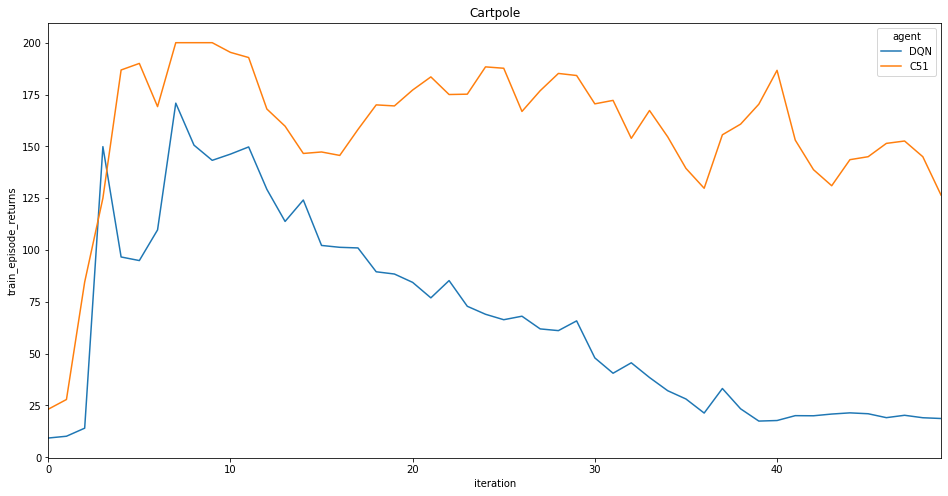

In [0]:
# @title Plot training results.

import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16,8))
sns.tsplot(data=data, time='iteration', unit='run',
           condition='agent', value='train_episode_returns', ax=ax)
plt.title('Cartpole')
plt.show()